In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd
from shapely.geometry import Polygon

#Import API key
from api_keys import geoapify_key

In [2]:
world_data = pd.read_csv("Resources/Foreign Aid Country Data.csv")

In [3]:
world_data.head()

,Country,Year,Debt,Aid,Aid / GDP,Corruption,GNI,GDP Growth,GDP Per Capita,log(GDP),GDP,Trade,Happiness Index
0,Afghanistan,2012,2580.6,410000000,0.020595,8.0,19938.7,12.752287,638.845852,10.299013,1.990732e+10,NaN,NaN
1,Afghanistan,2013,2587.8,771530000,0.038296,8.0,20216.7,5.600745,624.315455,10.304198,2.014640e+10,NaN,NaN
2,Afghanistan,2014,2529.9,258800000,0.012626,12.0,20494.8,2.724543,614.223342,10.311693,2.049713e+10,NaN,NaN
3,Afghanistan,2015,2596.9,472200000,0.024678,11.0,19307.2,1.451315,556.007221,10.281811,1.913421e+10,NaN,3.575
4,Afghanistan,2016,2596.1,799780000,0.044146,15.0,18297.1,2.260314,512.012778,10.258076,1.811656e+10,NaN,3.360


In [4]:
african_countries = ["Angola", "Botswana", "Burkina Faso", "Central African Republic", "Chad", "Djibouti", "Egypt, Arab Rep.", "Ethiopia", "Gabon", "Ghana", "Guinea" "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mauritania", "Mozambique", "Nigeria", "Rwanda", "Samoa", "Sao Tome and Principe", "Senegal", "Sierra Leone", "Somalia", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

In [5]:
africa = world_data[world_data["Country"].isin(african_countries)]

In [6]:
africa.head()

,Country,Year,Debt,Aid,Aid / GDP,Corruption,GNI,GDP Growth,GDP Per Capita,log(GDP),GDP,Trade,Happiness Index
18,Angola,2012,36856.3,40000000,0.000320,22.0,117631.1,8.54,4978.434435,11.096904,1.249982e+11,91.800097,NaN
19,Angola,2013,44072.8,80000000,0.000600,23.0,126809.8,4.95,5127.717243,11.125161,1.334016e+11,86.811933,NaN
20,Angola,2014,46456.0,365000000,0.002659,19.0,136862.3,4.82,5094.112329,11.137495,1.372444e+11,79.332923,NaN
21,Angola,2015,49254.1,650000000,0.007452,15.0,110286.1,0.94,3127.890598,10.940613,8.721929e+10,62.888516,4.033
22,Angola,2016,57827.3,157000000,0.003150,18.0,95850.2,-2.58,1728.023754,10.697582,4.984049e+10,53.370158,3.866


In [7]:
happiness = world_data.dropna()

In [8]:
happiness.head(20)

,Country,Year,Debt,Aid,Aid / GDP,Corruption,GNI,GDP Growth,GDP Per Capita,log(GDP),GDP,Trade,Happiness Index
12,Albania,2015,8447.0,502020000,0.044088,36.0,11521.8,2.218726,3952.802538,10.056404,1.138685e+10,71.801006,4.9590
13,Albania,2016,8516.2,71000000,0.005986,39.0,12053.8,3.314981,4124.055390,10.074129,1.186120e+10,74.809863,4.6550
14,Albania,2017,9801.5,171130000,0.013144,38.0,13051.5,3.802227,4531.019374,10.114601,1.301969e+10,78.194274,4.6440
15,Albania,2018,9875.8,111340000,0.007346,36.0,15138.0,4.019360,5287.663694,10.180597,1.515643e+10,76.808118,4.5860
16,Albania,2019,9556.9,51390000,0.003337,35.0,15198.7,2.088063,5396.215864,10.187572,1.540183e+10,76.279195,4.7190
17,Albania,2020,10859.2,98800000,0.006529,36.0,14637.4,-3.481630,5332.160475,10.179892,1.513187e+10,59.951749,4.8827
21,Angola,2015,49254.1,650000000,0.007452,15.0,110286.1,0.940000,3127.890598,10.940613,8.721929e+10,62.888516,4.0330
22,Angola,2016,57827.3,157000000,0.003150,18.0,95850.2,-2.580000,1728.023754,10.697582,4.984049e+10,53.370158,3.8660
23,Angola,2017,59175.9,615000000,0.008917,19.0,114618.2,-0.150000,2313.220584,10.838678,6.897276e+10,52.256822,3.7950
24,Angola,2018,63217.5,490000000,0.006299,19.0,93523.7,-1.316312,2524.942483,10.890940,7.779294e+10,66.378013,3.7950


In [9]:
world_data.columns

Index(['Country', 'Year', 'Debt', 'Aid', 'Aid / GDP', 'Corruption', 'GNI',
       'GDP Growth', 'GDP Per Capita', 'log(GDP)', 'GDP', 'Trade',
       'Happiness Index'],
      dtype='object')

In [10]:
grouped_year = africa.groupby('Year')

In [11]:
for year, group in grouped_year:
    print(f"Year: {year}")
    print(group)

Year: 2012
                      Country  Year     Debt         Aid  Aid / GDP  \
18                     Angola  2012  36856.3    40000000   0.000320   
108                  Botswana  2012   2526.4   104520000   0.007268   
126              Burkina Faso  2012   2588.6   223850000   0.017821   
171  Central African Republic  2012    577.2    26500000   0.010557   
180                      Chad  2012   2346.6    29630000   0.002396   
243                  Djibouti  2012    802.4    19200000   0.014184   
270          Egypt, Arab Rep.  2012  40028.2   973450000   0.003488   
288                  Ethiopia  2012  10463.9  6202200000   0.143202   
297                     Gabon  2012   3253.5   109000000   0.006348   
324                     Ghana  2012  11992.7   405500000   0.009825   
450                     Kenya  2012  11808.0  1453160000   0.025767   
495                   Lesotho  2012    877.1    27500000   0.011099   
504                   Liberia  2012    487.2   201450000   0.07216

In [12]:
total_aid_country = africa.groupby("Country")["Aid"].sum()

In [13]:
total_aid_country

Country
Angola                       4901550000
Botswana                     1009450000
Burkina Faso                 3738100000
Central African Republic      839840000
Chad                          958060000
Djibouti                      317630000
Egypt, Arab Rep.            23788320000
Ethiopia                    54253600000
Gabon                        1231830000
Ghana                        5143700000
Kenya                       10187870000
Lesotho                       579145000
Liberia                      1308620000
Madagascar                   2681320000
Malawi                       2710470000
Mauritania                    837120000
Mozambique                  25086530000
Nigeria                     26577440000
Rwanda                       4542320000
Samoa                         376720000
Sao Tome and Principe         206080000
Senegal                      4620570000
Sierra Leone                  928900000
Somalia                      1405680000
Sudan                         65

In [14]:
total_aid_country = africa.groupby('Country')['Aid'].sum().reset_index()

In [15]:
greatest_aid = total_aid_country.sort_values("Aid", ascending=False).head(5)
greatest_aid

,Country,Aid
7,Ethiopia,54253600000
17,Nigeria,26577440000
16,Mozambique,25086530000
6,"Egypt, Arab Rep.",23788320000
10,Kenya,10187870000


In [16]:
least_aid = total_aid_country.sort_values("Aid").head(5)

In [17]:
least_aid

,Country,Aid
20,Sao Tome and Principe,206080000
30,Zimbabwe,312300000
5,Djibouti,317630000
19,Samoa,376720000
11,Lesotho,579145000


In [92]:
total_debt_country = africa.groupby("Country")["Debt"].sum()

In [93]:
total_debt_country

Country
Angola                      488592.9
Botswana                     18463.1
Burkina Faso                 28037.1
Central African Republic      6713.1
Chad                         27988.7
Djibouti                     15315.5
Egypt, Arab Rep.            678849.1
Ethiopia                    196583.9
Gabon                        51326.8
Ghana                       190524.9
Kenya                       214724.5
Lesotho                       8340.3
Liberia                       8553.8
Madagascar                   30928.4
Malawi                       17932.3
Mauritania                   44951.9
Mozambique                  137044.2
Nigeria                     373309.5
Rwanda                       40275.2
Samoa                         3891.7
Sao Tome and Principe         2202.5
Senegal                      88174.3
Sierra Leone                 14825.9
Somalia                      29964.2
Sudan                       197036.4
Tanzania                    173292.9
Togo                         1

In [97]:
total_debt_country = africa.groupby('Country')['Debt'].sum().reset_index()

In [98]:
greatest_debt = total_debt_country.sort_values("Debt", ascending=False).head(5)
greatest_debt

,Country,Debt
6,"Egypt, Arab Rep.",678849.1
0,Angola,488592.9
17,Nigeria,373309.5
27,Tunisia,283365.5
10,Kenya,214724.5


In [101]:
least_debt = total_debt_country.sort_values("Debt").head(5)

In [102]:
least_debt

,Country,Debt
20,Sao Tome and Principe,2202.5
19,Samoa,3891.7
3,Central African Republic,6713.1
11,Lesotho,8340.3
12,Liberia,8553.8


In [69]:
total_aid_year = africa.groupby("Year")["Aid"].sum()

In [70]:
total_aid_year

Year
2012    15728750000
2013    10953085000
2014    18646960000
2015    22701505000
2016    11040360000
2017    38431290000
2018    23209015000
2019    19688830000
2020    38887090000
Name: Aid, dtype: int64

In [81]:
from matplotlib.ticker import FuncFormatter

In [127]:
merged_aid_debt = pd.concat([total_aid_country, total_debt_country], axis=1, keys=['Aid', 'Debt'])

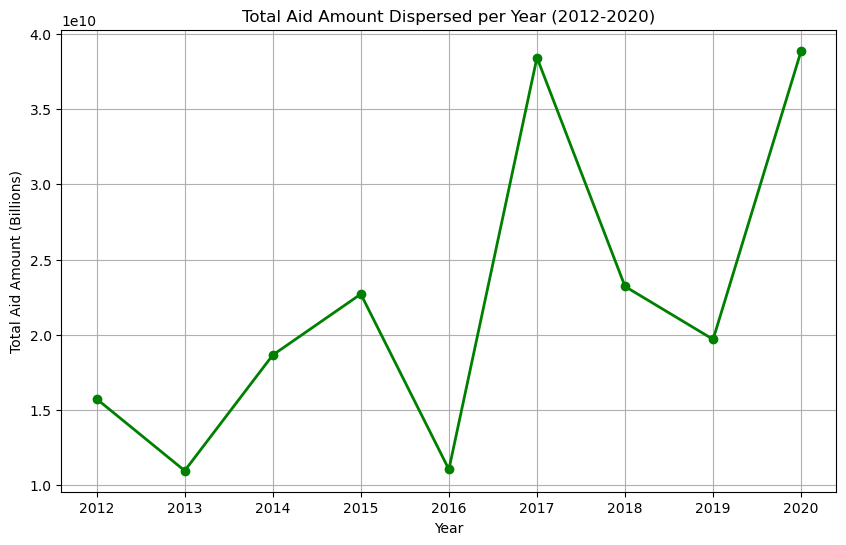

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(total_aid_year.index, total_aid_year.values, marker='o', color='g', linestyle='-', linewidth=2)

plt.title('Total Aid Amount Dispersed per Year (2012-2020)')
plt.xlabel('Year')
plt.ylabel('Total Aid Amount (Billions)')
plt.grid(True)
plt.xticks(total_aid_year.index)

plt.show()

In [162]:
total_aid_by_year = africa.groupby("Year")["Aid"].sum()
total_gni_by_year = africa.groupby("Year")["GNI"].sum()

In [163]:
print("Total Aid by Year:")
print(total_aid_by_year)

print("Total GNI by Year:")
print(total_gni_by_year)

Total Aid by Year:
Year
2012    15728750000
2013    10953085000
2014    18646960000
2015    22701505000
2016    11040360000
2017    38431290000
2018    23209015000
2019    19688830000
2020    38887090000
Name: Aid, dtype: int64
Total GNI by Year:
Year
2012    1282077.9
2013    1406901.4
2014    1508848.9
2015    1433814.2
2016    1361058.0
2017    1284356.9
2018    1320825.3
2019    1437072.8
2020    1460131.6
Name: GNI, dtype: float64
